***Product Clustering Using K-Means***

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Dataset loading


In [2]:
data = pd.read_csv('online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [4]:
data.shape

(1067371, 8)

## 3. Data Cleaning

In [5]:
# Remove duplicates
data = data.drop_duplicates()  
# Drop rows with missing CustomerID
data = data.dropna(subset=['Customer ID']) 
# Remove rows with non-positive quantity
data = data[data['Quantity'] > 0]  


## 4. Feature Engineering

In [6]:
product_sales = data.groupby('StockCode').agg({
    'Quantity': 'sum',  # Total quantity purchased
    'Price': 'mean'  # Average unit price
}).reset_index()
product_sales['TotalRevenue'] = product_sales['Quantity'] * product_sales['Price']

## 5. Feature Selection

In [7]:
features = product_sales[['Quantity', 'TotalRevenue']]

## 6. Standardize the features

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 7. Use of Elbow Method

In [9]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

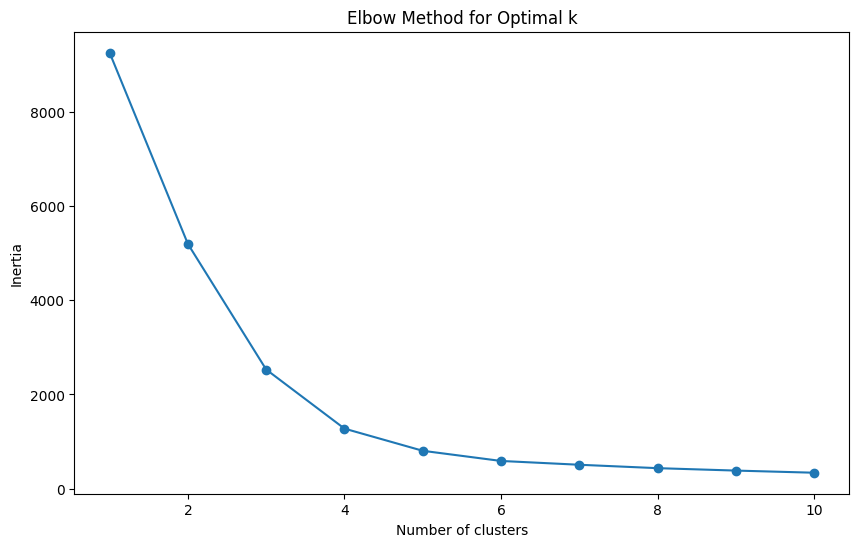

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# From the Elbow Method, choose the optimal number of clusters (e.g., k=5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

## 8. Adding Cluster Information

In [12]:
# Add cluster information to the dataset
product_sales['Cluster'] = clusters

## 9. Cluster Visualization

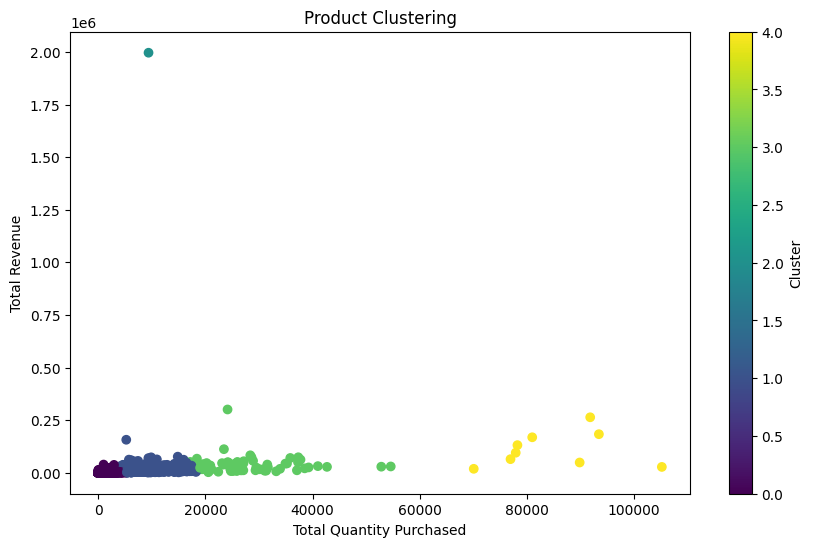

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(product_sales['Quantity'], product_sales['TotalRevenue'], c=product_sales['Cluster'], cmap='viridis')
plt.title('Product Clustering')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Revenue')
plt.colorbar(label='Cluster')
plt.show()

1. **Products in cluster 0 have high total revenue but moderate quantity**
2. **Products in cluster 1 have low total revenue but high quantity**


## 10. Clustering Evaluation

In [14]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.78


## Result
*Silhouette score of 0.78 indicates that clustering appproach has been successful and the clusters ormed are distinct as well as cohesive which is enhancing the product recommendations*